# INFO1998 Group Project: Supermarket Sales

By Amy Zhang, Raymond Zhang, Krystal Kwan

In the summer, the group mates all traveled around the States, in our conversation, we discovered that the market prices of many products seem to be very different on the two coasts. Sharing our confusion, we found a dataset on supermarket orders across the entire country on Kaggle: <https://www.kaggle.com/datasets/abiodunonadeji/united-state-superstore-sales?resource=download>, and decided to look into the prices, sales and profits of supermarket orders in different regions of United States. And that spoiled our research question: 
\
**How will states/regions affect the sales of a product from a specific category?** \
We plan to develop two machine learning models to investigate how different factors would affect the sales and profits of a product. With visualizations, we hope to conclude a trend and compare the different sales/profit performances in different regions, and provide some insight into the cause of this trend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#Data Cleaning and Manipulation
df = pd.read_excel('supermarket_data.xls')

#Drop unecessary information that cannot be used for analysis
df=df.drop('Row ID',axis=1)
df=df.drop('Order ID', axis=1)
df=df.drop('Customer ID', axis=1)
df=df.drop('Customer Name', axis=1)
df=df.drop('Product ID',axis=1)
df=df.drop('Product Name',axis=1)

#Change region into dummy vairiables
df['Central']=0
df['South']=0
df['West']=0
df['East']=0
for x in range(0,len(df)):
    if df['Region'][x]=='Central':
        df['Central'][x]=1
    elif df['Region'][x]=='South':
        df['South'][x]=1
    elif df['Region'][x]=='West':
        df['West'][x]=1
    elif df['Region'][x]=='East':
        df['East'][x]=1
        
#Abbreviate the state names
df['State_ab']= ''
state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
df["State_ab"] = df.State.map(state_to_abbrev)

#Encode the states according to population ranking
df['State_pop']= ''
state_to_population_ranking_encoding = {
"CA": 52, "TX": 51, "FL": 50, "NY": 49, "PA": 48, "IL": 47,
"OH": 46, "GA": 45, "NC": 44, "MI": 43, "NJ": 42, "VA": 41,
"WA": 40, "AZ": 39, "TN": 38, "MA": 37, "IN": 36, "MO": 35,
"MD": 34, "CO": 33, "WI": 32, "MN": 31, "SC": 30, "AL": 29,
"LA": 28, "KY": 27, "OR": 26, "OK": 25, "CT": 24, "UT": 23,
"PR": 22, "NV": 21, "IA": 20, "AR": 19, "MS": 18, "KS": 17,
"NM": 16, "NE": 15, "ID": 14, "WV": 13, "HI": 12, "NH": 11,
"ME": 10, "MT": 9, "RI": 8, "DE": 7, "SD": 6, "ND": 5,
"AK": 4, "DC": 3, "VT": 2, "WY": 1
}
df["State_pop"] = df.State_ab.map(state_to_population_ranking_encoding)

df.head()

<ipython-input-4-dab38503adb2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['South'][x]=1
<ipython-input-4-dab38503adb2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['West'][x]=1
<ipython-input-4-dab38503adb2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Central'][x]=1
<ipython-input-4-dab38503adb2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Sales,Quantity,Discount,Profit,Central,South,West,East,State_ab,State_pop
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,261.9600,2,0.00,41.9136,0,1,0,0,KY,27
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,731.9400,3,0.00,219.5820,0,1,0,0,KY,27
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,14.6200,2,0.00,6.8714,0,0,1,0,CA,52
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,957.5775,5,0.45,-383.0310,0,1,0,0,FL,50
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,22.3680,2,0.20,2.5164,0,1,0,0,FL,50


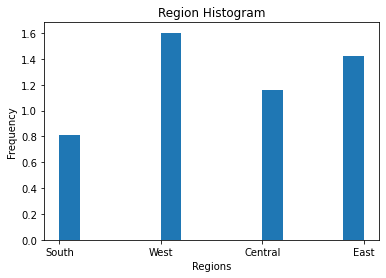

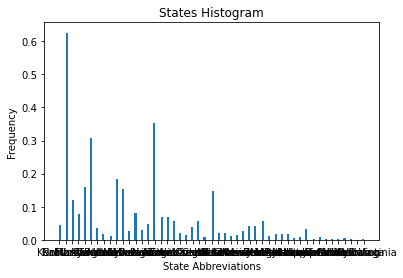

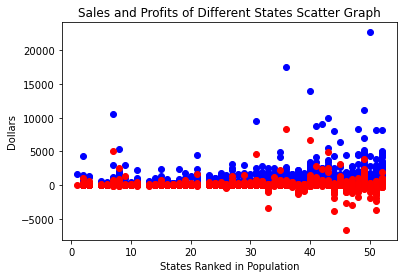

In [8]:
#Visualization of Raw Data

#Frequency of Different Regions
plt.hist(df['Region'],bins=15,density=True)
plt.title('Region Histogram')
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.show()

#Frequency of Different States
plt.hist(df['State'],bins=150,density=True)
plt.title('States Histogram')
plt.xlabel('State Abbreviations')
plt.ylabel('Frequency')
plt.show()

#Scatter of Sales and Profit of Different States
plt.plot(df['State_pop'], df['Sales'], 'bo')
plt.plot(df['State_pop'], df['Profit'], 'ro') 
plt.title('Sales and Profits of Different States Scatter Graph')
plt.xlabel('States Ranked in Population')
plt.ylabel('Dollars')

plt.show()